<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Softmax Classifer 1D </font></h1> 

# Table of Contents
In this lab, you will use Softmax to classify 1D data.


<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Helper functions</a></li>

<li><a href="#ref1">Prepare Data</a></li>
<li><a href="#ref2">Softmax Classifier</a></li>
<li><a href="#ref3">Criterion function, Optimizer, and Train the Model</a></li>
<li><a href="#ref4">Analyze Results on Test Data</a></li>

<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

<a id="ref0"></a>
<h2 align=center>Helper functions</h2>

Use the helper function to plot labeled data points: 

In [2]:
def plot_data(data_set,model=None,n=1,color=False):
    X=data_set[:][0]
    Y=data_set[:][1]
    plt.plot(X[Y==0,0].numpy(),Y[Y==0].numpy(),'bo',label='y=0')
    plt.plot(X[Y==1,0].numpy(),0*Y[Y==1].numpy(),'ro',label='y=1')
    plt.plot(X[Y==2,0].numpy(),0*Y[Y==2].numpy(),'go',label='y=2')
    plt.ylim((-0.1,3))
    plt.legend()
    if model!=None:
        w=list(model.parameters())[0][0].detach()
        b=list(model.parameters())[1][0].detach()
        y_lable=['yhat=0','yhat=1','yhat=2']
        y_color=['b','r','g']
        Y=[]
        for w,b,y_l,y_c in zip(model.state_dict()['0.weight'],model.state_dict()['0.bias'],y_lable,y_color):
            Y.append((w*X+b).numpy())
            plt.plot(X.numpy(),(w*X+b).numpy(),y_c,label=y_l)
        if color==True:
            x=X.numpy()
            x=x.reshape(-1)
            top=np.ones(x.shape)
            y0=Y[0].reshape(-1)
            y1=Y[1].reshape(-1)
            y2=Y[2].reshape(-1)
            plt.fill_between(x,y0, where=y1>y1,interpolate=True, color='blue')
            plt.fill_between(x,y0, where=y1>y2,interpolate=True, color='blue')
            plt.fill_between(x,y1, where=y1>y0,interpolate=True, color='red')
            plt.fill_between(x,y1, where=((y1>y2)*(y1>y0)),interpolate=True, color='red')
            plt.fill_between(x,y2, where=(y2>y0)*(y0>0),interpolate=True, color='green')
            plt.fill_between(x,y2, where=(y2>y1),interpolate=True, color='green')
    plt.legend()
    plt.show()

<a id="ref1"></a>
<h2 align=center>Prepare Data </h2> 

Create some linearly separable data with three classes: 

In [3]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-2,2,0.1).view(-1,1)
        self.y=-torch.zeros(self.x.shape[0])
        self.y[(self.x>-1.0)[:,0] * (self.x<1.0)[:,0] ]=1
        self.y[(self.x >=1.0)[:,0]]=2
        self.y=self.y.type(torch.LongTensor)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [4]:
torch.manual_seed(0)

Create the dataset object:

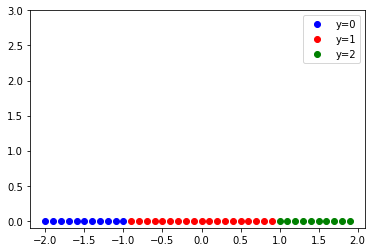

In [5]:
data_set=Data()
data_set.x
plot_data(data_set)

<a id="ref2"></a>
### Build a Softmax Classifer 

Build a Softmax classifier by using the Sequential module:

In [6]:
model=nn.Sequential(nn.Linear(1,3))
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

<a id="ref3"></a>
<h2>Criterion function, Optimizer, and Train the  Model</h2> 

In [7]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)
trainloader=DataLoader(dataset=data_set,batch_size=5)

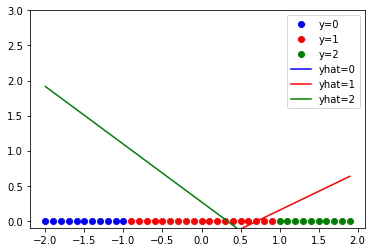

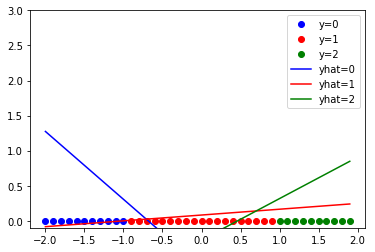

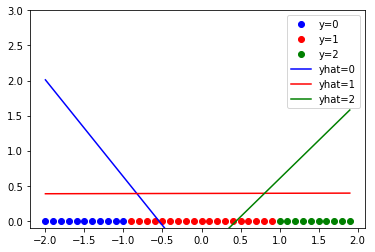

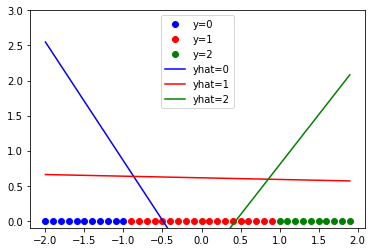

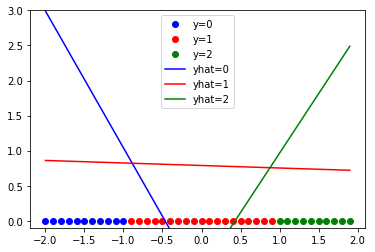

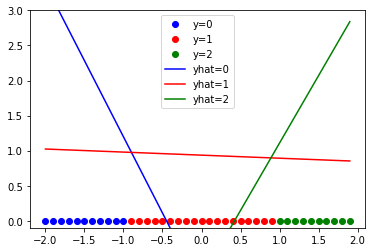

In [8]:
LOSS=[]
for epoch in range(300):
    if epoch%50==0:
        pass
        plot_data(data_set,model)
    for x,y in trainloader:
        
        optimizer.zero_grad()
        
        yhat= model(x)
        loss = criterion(yhat, y)
        LOSS.append(loss)
        loss.backward()
        optimizer.step()
       

<a id="ref3"></a>
<h2 align=center>Analyze Results</h2> 

Find the predicted class on the test data: 

In [9]:
z=model(data_set.x)
_, yhat = z.max(1)
yhat

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Calculate the accuracy on test data:

In [10]:
correct=(data_set.y==yhat).sum().item()
accuracy=correct/len(data_set)
accuracy

0.975

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/)

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).